# Graded Challenge 1

Name    : Aan Nurliyanah

Batch   : 002

## Description

### Objective
Tugas ini adalah Graded Challenge pertama yang bertujuan untuk memahami dan mengeksplorasi data yang disediakan dari Google Big Query Public Dataset, data diambil di bagian `bigquery-public-data`. Tabel yang digunakan dalam tugas ini adalah tabel `summary` pada database `covid19_jhu_csse_eu`. Tabel ini berisi data covid diantaranya jumlah kematian, confirmed case, recovered, hingga status yang masih aktif di berbagai negara dan provinsi. 

Penyebaran virus covid-19 pertama kali terjadi di negara China. Negara China termasuk salah satu negara di Asia dan tergolong kawasan Asia Timur . Beberapa negara yang tergolong kawasan Asia Timur diantaranya adalah China, Hong Kong,Mongolia, South Korea, North Korea, Japan, Taiwan. Bagaimana dampak dari penyebaran di negara China terhadap negara-negara tetangga di kawasan tersebut akan terlihat dari banyaknya jumlah kasusnya. 



### Problem Statement 

Saya akan mengambil data dari negara-negara Asia Timur yaitu China, Hong Kong, Mongolia, South Korea, North Korea, Japan, Taiwan untuk selanjutnya akan saya analisis dan bandingkan negara terpilih yang datanya sudah siap digunakan.
Data yang akan digunakan hanya data di sepanjang tahun 2020.
Selanjutnya akan di eksplor mengenai :
- Jumlah konfirm, sembuh,dan aktif di negara mana yang terbesar jumlahnya
- Jumlah kematian berdasarkan periode Q1,Q2,Q3 dan Q4 pada tahun 2020
- Membandingkan rata-rata tingkat kematian apakah termasuk kategori tinggi atau rendah  




## Working Area

SQL Query untuk Dataset yang diambil adalah :

Pertama saya melihat daftar negara apa saja yang ada di dalam data set, dengan query:

SELECT country_region
FROM `bigquery-public-data.covid19_jhu_csse_eu.summary`
ORDER BY country_region ASC

Selain itu saya mengecek penamaan negara yang akan saya pilih,misal (china : %ina, mongolia : %olia dst) dengan query :
SELECT country_region
FROM `bigquery-public-data.covid19_jhu_csse_eu.summary`
WHERE country_region LIKE "%ina"


Selanjutnya saya memutuskan untuk mengambil data dari beberapa negara kawasan Asia timur dengan query:

SELECT province_state, country_region, date, latitude, longitude, location_geom, confirmed, deaths, recovered, active
FROM `bigquery-public-data.covid19_jhu_csse_eu.summary` 
WHERE 
country_region IN ("China","Hong Kong","Mongolia","Korea, South","Korea, North","Japan","Taiwan") AND
date BETWEEN "2020-01-01" AND "2020-12-31"
ORDER BY date ASC



### Libraries Used

Dalam tugas ini,libraries yang digunakan adalah numpy dan pandas.

Pastikan numpy dan pandas sudah terinstall dan siap digunakan.

In [1]:
! pip install numpy

Defaulting to user installation because normal site-packages is not writeable


In [2]:
! pip install pandas

Defaulting to user installation because normal site-packages is not writeable


Kemudian import numpy dan pandas dengan penamaan baru,
numpy as np, dan pandas as pd

In [3]:
import numpy as np
import pandas as pd 

### Data loading

Memanggil data yang sudah di download dan di simpan di local folder dengan nama `h8dsft_P0GC1_Aan_Nurliyanah.csv` , data berasal dari Big Query Public Dataset, data diambil di bagian `bigquery-public-data`. Tabel yang digunakan dalam tugas ini adalah tabel `summary` pada database `covid19_jhu_csse_eu`. 

Memanggil data dengan menggunakan pd.read_csv karena data dalam bentuk csv, juga di tambahkan dengan menambahkan na_values apabila ada data kosong yang isinya '?',' ','99999','N/A' akan didefinisikan sebagai missing values.

In [4]:
dfcovid_asiatimur = pd.read_csv('h8dsft_P0GC1_Aan_Nurliyanah.csv', na_values=['?',' ','99999','N/A'])

In [5]:
dfcovid_asiatimur

,province_state,country_region,date,latitude,longitude,location_geom,confirmed,deaths,recovered,active
0,Hong Kong,Hong Kong,2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Taiwan,Taiwan,2020-01-22,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2,NaN,Japan,2020-01-22,NaN,NaN,NaN,2.0,NaN,NaN,NaN
3,Hong Kong,Hong Kong,2020-01-23,NaN,NaN,NaN,2.0,NaN,NaN,NaN
4,Taiwan,Taiwan,2020-01-23,NaN,NaN,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
21210,Yamagata,Japan,2020-12-31,38.448396,140.102154,POINT(140.102154 38.448396),390.0,6.0,292.0,92.0
21211,Yamaguchi,Japan,2020-12-31,34.201190,131.573293,POINT(131.573293 34.20119),588.0,3.0,448.0,137.0
21212,Yamanashi,Japan,2020-12-31,35.612364,138.611489,POINT(138.611489 35.612364),568.0,11.0,465.0,92.0
21213,NaN,"Korea, South",2020-12-31,35.907757,127.766922,POINT(127.766922 35.907757),61769.0,917.0,42953.0,17899.0


setelah dataset di panggil,kemudian di cek data teratas dan data terbawahnya seperti berikut untuk melihat gambaran dari tabel menggunakan head dan tail.

In [6]:
dfcovid_asiatimur.head(10)

,province_state,country_region,date,latitude,longitude,location_geom,confirmed,deaths,recovered,active
0,Hong Kong,Hong Kong,2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Taiwan,Taiwan,2020-01-22,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2,NaN,Japan,2020-01-22,NaN,NaN,NaN,2.0,NaN,NaN,NaN
3,Hong Kong,Hong Kong,2020-01-23,NaN,NaN,NaN,2.0,NaN,NaN,NaN
4,Taiwan,Taiwan,2020-01-23,NaN,NaN,NaN,1.0,NaN,NaN,NaN
5,NaN,Japan,2020-01-23,NaN,NaN,NaN,1.0,NaN,NaN,NaN
6,Taiwan,Taiwan,2020-01-24,NaN,NaN,NaN,3.0,NaN,NaN,NaN
7,Hong Kong,Hong Kong,2020-01-24,NaN,NaN,NaN,2.0,NaN,NaN,NaN
8,NaN,Japan,2020-01-24,NaN,NaN,NaN,2.0,NaN,NaN,NaN
9,Hong Kong,Hong Kong,2020-01-25,NaN,NaN,NaN,5.0,NaN,NaN,NaN


In [7]:
dfcovid_asiatimur.tail(10)

,province_state,country_region,date,latitude,longitude,location_geom,confirmed,deaths,recovered,active
21205,Tokyo,Japan,2020-12-31,35.711343,139.446921,POINT(139.446921 35.711343),60245.0,582.0,49983.0,9680.0
21206,Tottori,Japan,2020-12-31,35.359069,133.863619,POINT(133.863619 35.359069),122.0,0.0,66.0,56.0
21207,Toyama,Japan,2020-12-31,36.637464,137.269346,POINT(137.269346 36.637464),561.0,26.0,475.0,60.0
21208,Unknown,Japan,2020-12-31,NaN,NaN,NaN,8.0,0.0,8.0,0.0
21209,Wakayama,Japan,2020-12-31,33.911879,135.505446,POINT(135.505446 33.911879),616.0,7.0,562.0,47.0
21210,Yamagata,Japan,2020-12-31,38.448396,140.102154,POINT(140.102154 38.448396),390.0,6.0,292.0,92.0
21211,Yamaguchi,Japan,2020-12-31,34.201190,131.573293,POINT(131.573293 34.20119),588.0,3.0,448.0,137.0
21212,Yamanashi,Japan,2020-12-31,35.612364,138.611489,POINT(138.611489 35.612364),568.0,11.0,465.0,92.0
21213,NaN,"Korea, South",2020-12-31,35.907757,127.766922,POINT(127.766922 35.907757),61769.0,917.0,42953.0,17899.0
21214,NaN,Mongolia,2020-12-31,46.862500,103.846700,POINT(103.8467 46.8625),1220.0,1.0,837.0,382.0


### Data Cleaning

Untuk mengecek dan mengetahui apakah ada missing value di dalam tabel. Menggunakan metode isnull dan isna beserta sum untuk mengetahui jumlah data yang kosong di setiap baris dan kolom.

In [8]:
dfcovid_asiatimur.isnull().sum()

province_state    720
country_region      0
date                0
latitude          553
longitude         553
location_geom     553
confirmed           1
deaths             30
recovered          24
active            569
dtype: int64

In [9]:
dfcovid_asiatimur.isna().sum()

province_state    720
country_region      0
date                0
latitude          553
longitude         553
location_geom     553
confirmed           1
deaths             30
recovered          24
active            569
dtype: int64

Terdapat beberapa kolom yang masih terdapat missing value diantaranya province_state, latitude, longitude, location_geom,confirmed, deaths, recovered dan active.

Selanjutnya menghapus kolom latitude , longitude, dan location_geom karena tidak akan digunakan dalam analisis dan memiliki banyak sekali missing value dengan jumlah 553. 

In [10]:
delete_column = ['latitude', 'longitude', 'location_geom']
dfcovid_asiatimur = dfcovid_asiatimur.drop(delete_column, axis=1)

Setelah hapus kolom, kita lihat lagi jumlah missing value nya, juga pastikan di dalam tabel apakah kolom sudah terhapus

In [11]:
dfcovid_asiatimur.isna().sum()

province_state    720
country_region      0
date                0
confirmed           1
deaths             30
recovered          24
active            569
dtype: int64

In [12]:
dfcovid_asiatimur

,province_state,country_region,date,confirmed,deaths,recovered,active
0,Hong Kong,Hong Kong,2020-01-22,NaN,NaN,NaN,NaN
1,Taiwan,Taiwan,2020-01-22,1.0,NaN,NaN,NaN
2,NaN,Japan,2020-01-22,2.0,NaN,NaN,NaN
3,Hong Kong,Hong Kong,2020-01-23,2.0,NaN,NaN,NaN
4,Taiwan,Taiwan,2020-01-23,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
21210,Yamagata,Japan,2020-12-31,390.0,6.0,292.0,92.0
21211,Yamaguchi,Japan,2020-12-31,588.0,3.0,448.0,137.0
21212,Yamanashi,Japan,2020-12-31,568.0,11.0,465.0,92.0
21213,NaN,"Korea, South",2020-12-31,61769.0,917.0,42953.0,17899.0


Selanjutnya untuk missing value di dalam kolom province_satate akan diisi dengan fillna dengan value = `none`

In [13]:
dfcovid_asiatimur["province_state"].fillna(
    value="none",
inplace=True
)

In [14]:
dfcovid_asiatimur

,province_state,country_region,date,confirmed,deaths,recovered,active
0,Hong Kong,Hong Kong,2020-01-22,NaN,NaN,NaN,NaN
1,Taiwan,Taiwan,2020-01-22,1.0,NaN,NaN,NaN
2,none,Japan,2020-01-22,2.0,NaN,NaN,NaN
3,Hong Kong,Hong Kong,2020-01-23,2.0,NaN,NaN,NaN
4,Taiwan,Taiwan,2020-01-23,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
21210,Yamagata,Japan,2020-12-31,390.0,6.0,292.0,92.0
21211,Yamaguchi,Japan,2020-12-31,588.0,3.0,448.0,137.0
21212,Yamanashi,Japan,2020-12-31,568.0,11.0,465.0,92.0
21213,none,"Korea, South",2020-12-31,61769.0,917.0,42953.0,17899.0


Setelah itu kita cek lagi data missing value nya,

In [15]:
dfcovid_asiatimur.isna().sum()

province_state      0
country_region      0
date                0
confirmed           1
deaths             30
recovered          24
active            569
dtype: int64

Untuk sisa data yang masih missing value di kolom confirmed, deaths, recovered, active akan di hapus dengan menggunakan dropna perbaris.

In [16]:
deletenull_baris= dfcovid_asiatimur.dropna(axis=0,inplace=True)

Mengecek kembali setiap baris apakah masih ada missing value

In [17]:
dfcovid_asiatimur.isnull().sum()

province_state    0
country_region    0
date              0
confirmed         0
deaths            0
recovered         0
active            0
dtype: int64

In [18]:
dfcovid_asiatimur.isna().any()

province_state    False
country_region    False
date              False
confirmed         False
deaths            False
recovered         False
active            False
dtype: bool

Data sudah siap dan tidak ada missing value.
selanjutnya pastikan jumlah baris sesuai kolom yg terisi sesuai dengan tabel dengan menggunakan count.

In [19]:
dfcovid_asiatimur.count()

province_state    20646
country_region    20646
date              20646
confirmed         20646
deaths            20646
recovered         20646
active            20646
dtype: int64

In [20]:
dfcovid_asiatimur

,province_state,country_region,date,confirmed,deaths,recovered,active
542,Macau,China,2020-03-22,20.0,0.0,10.0,10.0
543,Gansu,China,2020-03-22,136.0,2.0,114.0,20.0
544,Chongqing,China,2020-03-22,577.0,6.0,570.0,1.0
545,Hubei,China,2020-03-22,67800.0,3144.0,59433.0,5223.0
546,Hong Kong,China,2020-03-22,317.0,4.0,100.0,213.0
...,...,...,...,...,...,...,...
21210,Yamagata,Japan,2020-12-31,390.0,6.0,292.0,92.0
21211,Yamaguchi,Japan,2020-12-31,588.0,3.0,448.0,137.0
21212,Yamanashi,Japan,2020-12-31,568.0,11.0,465.0,92.0
21213,none,"Korea, South",2020-12-31,61769.0,917.0,42953.0,17899.0


Sekarang kita sudah siap dengan data dfcovid_asiatimur.

Mengetahui negara apa saja yang mempunyai value dan dihitung jumlahnya dengan country_region.value_counts

In [21]:
dfcovid_asiatimur.country_region.value_counts()

Japan           10671
China            9405
Korea, South      285
Mongolia          285
Name: country_region, dtype: int64

Selanjutnya mengganti nama masing-masing kolom dengan nama baru :  provinsi', 'negara', 'tanggal', 'konfirm','meninggal','sembuh','aktif

In [22]:
dfcovid_asiatimur.columns = ['provinsi', 'negara', 'tanggal', 'konfirm','meninggal','sembuh','aktif']

In [23]:
dfcovid_asiatimur

,provinsi,negara,tanggal,konfirm,meninggal,sembuh,aktif
542,Macau,China,2020-03-22,20.0,0.0,10.0,10.0
543,Gansu,China,2020-03-22,136.0,2.0,114.0,20.0
544,Chongqing,China,2020-03-22,577.0,6.0,570.0,1.0
545,Hubei,China,2020-03-22,67800.0,3144.0,59433.0,5223.0
546,Hong Kong,China,2020-03-22,317.0,4.0,100.0,213.0
...,...,...,...,...,...,...,...
21210,Yamagata,Japan,2020-12-31,390.0,6.0,292.0,92.0
21211,Yamaguchi,Japan,2020-12-31,588.0,3.0,448.0,137.0
21212,Yamanashi,Japan,2020-12-31,568.0,11.0,465.0,92.0
21213,none,"Korea, South",2020-12-31,61769.0,917.0,42953.0,17899.0


Nama kolom sudah terganti dan nantinya agar mudah digunakan dalam query. 

In [24]:
dfcovid_asiatimur.describe()

,konfirm,meninggal,sembuh,aktif
count,20646.000000,20646.000000,20646.000000,20646.000000
mean,2396.463383,85.361281,2115.560496,195.400901
std,8921.248848,516.784519,8139.839521,834.471088
min,0.000000,0.000000,0.000000,-3640.000000
25%,147.000000,1.000000,136.000000,0.000000
50%,356.000000,3.000000,310.000000,8.000000
75%,950.000000,10.000000,932.000000,64.000000
max,68149.000000,4512.000000,64435.000000,17899.000000


Menampilkan descriptive statistics secara keseluruhan dari kolom konfirm,meninggal,sembuh dan aktif 

In [25]:
dfcovid_asiatimur.meninggal.mean()

85.36128063547419

Setelah mendapatkan nilai rata-rata meninggal, akan dimasukan ke dalam query selanjutnya.

Menambahkan kolom baru yang berisi : keterangan tingkat kematian 
- Angka kematian tinggi jika jumlah meninggal > 85 
- Angka kematian rendah jika <85

dengan menggunakan fungsi if elif dan loop

In [26]:
new_columns = []

for i in range(len(dfcovid_asiatimur)):
  if dfcovid_asiatimur.meninggal.iloc[i] > 85:
    new_columns.append('Angka Kematian Tinggi')
  else:
    new_columns.append('Angka Kematian Rendah')   
  

In [27]:
dfcovid_asiatimur['tingkat_kematian']= new_columns

In [28]:
dfcovid_asiatimur

,provinsi,negara,tanggal,konfirm,meninggal,sembuh,aktif,tingkat_kematian
542,Macau,China,2020-03-22,20.0,0.0,10.0,10.0,Angka Kematian Rendah
543,Gansu,China,2020-03-22,136.0,2.0,114.0,20.0,Angka Kematian Rendah
544,Chongqing,China,2020-03-22,577.0,6.0,570.0,1.0,Angka Kematian Rendah
545,Hubei,China,2020-03-22,67800.0,3144.0,59433.0,5223.0,Angka Kematian Tinggi
546,Hong Kong,China,2020-03-22,317.0,4.0,100.0,213.0,Angka Kematian Rendah
...,...,...,...,...,...,...,...,...
21210,Yamagata,Japan,2020-12-31,390.0,6.0,292.0,92.0,Angka Kematian Rendah
21211,Yamaguchi,Japan,2020-12-31,588.0,3.0,448.0,137.0,Angka Kematian Rendah
21212,Yamanashi,Japan,2020-12-31,568.0,11.0,465.0,92.0,Angka Kematian Rendah
21213,none,"Korea, South",2020-12-31,61769.0,917.0,42953.0,17899.0,Angka Kematian Tinggi


Menampilkan sampel data secara acak 

In [29]:
dfcovid_asiatimur.sample(20)

,provinsi,negara,tanggal,konfirm,meninggal,sembuh,aktif,tingkat_kematian
10289,Wakayama,Japan,2020-08-23,225.0,5.0,182.0,38.0,Angka Kematian Rendah
10358,Okayama,Japan,2020-08-24,141.0,0.0,110.0,31.0,Angka Kematian Rendah
16953,Qinghai,China,2020-11-11,18.0,0.0,18.0,0.0,Angka Kematian Rendah
21133,Chongqing,China,2020-12-31,590.0,6.0,584.0,0.0,Angka Kematian Rendah
2443,Tibet,China,2020-05-13,1.0,0.0,1.0,0.0,Angka Kematian Rendah
16391,Iwate,Japan,2020-11-04,29.0,0.0,25.0,4.0,Angka Kematian Rendah
19967,Hong Kong,China,2020-12-17,7899.0,125.0,6534.0,1240.0,Angka Kematian Tinggi
4042,Fukui,Japan,2020-06-10,122.0,8.0,113.0,1.0,Angka Kematian Rendah
1968,Qinghai,China,2020-04-30,18.0,0.0,18.0,0.0,Angka Kematian Rendah
13760,Ningxia,China,2020-10-04,75.0,0.0,75.0,0.0,Angka Kematian Rendah


## Data Loading

Selanjutnya menunjukan hasil provinsi,negara,tingkat_kematian dilihat dari jumlah max meninggal 

In [30]:
dfcovid_tingkatkematian = dfcovid_asiatimur.groupby(
    ['provinsi','negara','tingkat_kematian'])[['meninggal']].max().sort_values(by='meninggal', ascending=False)
  

In [31]:
dfcovid_tingkatkematian

meninggal
provinsi negara       tingkat_kematian                
Hubei    China        Angka Kematian Tinggi     4512.0
none     Korea, South Angka Kematian Tinggi      917.0
         Japan        Angka Kematian Tinggi      858.0
Tokyo    Japan        Angka Kematian Tinggi      582.0
Osaka    Japan        Angka Kematian Tinggi      528.0
...                                                ...
Tottori  Japan        Angka Kematian Rendah        0.0
Ningxia  China        Angka Kematian Rendah        0.0
Qinghai  China        Angka Kematian Rendah        0.0
Tibet    China        Angka Kematian Rendah        0.0
Shimane  Japan        Angka Kematian Rendah        0.0

[94 rows x 1 columns]

Membandingkan antara periode Q1 ,Q2,Q3,Q4 untuk melihat jumlah meninggal serta kenaikan dan penurunan kasus meninggal terjadi di periode ke berapa.

In [32]:
periode_Q1 = dfcovid_asiatimur[(dfcovid_asiatimur['tanggal'] >= "2020-01-01") & (dfcovid_asiatimur['tanggal'] <= "2020-03-31")]

In [33]:
Q1= periode_Q1.groupby(['provinsi'])[['meninggal','tanggal']].sum().sort_values(by= 'meninggal',ascending=False)

In [34]:
Q1.rename(columns={'meninggal':'Q1'},inplace=True)

In [35]:
Q1

,Q1
provinsi,
Hubei,31695.0
none,1825.0
Henan,220.0
Heilongjiang,130.0
Beijing,80.0
Guangdong,80.0
Shandong,70.0
Hebei,60.0
Anhui,60.0


In [36]:
periode_Q2 = dfcovid_asiatimur[(dfcovid_asiatimur['tanggal'] >= "2020-04-01") & (dfcovid_asiatimur['tanggal'] <= "2020-06-30")]

In [37]:
Q2= periode_Q2.groupby(['provinsi'])[['meninggal','tanggal']].sum().sort_values(by= 'meninggal',ascending=False)

In [38]:
Q2.rename(columns={'meninggal':'Q2'},inplace=True)

In [39]:
Q2

,Q2
provinsi,
Hubei,389804.0
none,47354.0
Tokyo,10685.0
Hokkaido,3134.0
Kanagawa,3091.0
...,...
Niigata,0.0
Saga,0.0
Qinghai,0.0


In [40]:
periode_Q3 = dfcovid_asiatimur[(dfcovid_asiatimur['tanggal'] >= "2020-07-01") & (dfcovid_asiatimur['tanggal'] <= "2020-10-31")]

In [41]:
Q3= periode_Q3.groupby(['provinsi'])[['meninggal','tanggal']].sum().sort_values(by= 'meninggal',ascending=False)

In [42]:
Q3.rename(columns={'meninggal':'Q3'},inplace=True)

In [43]:
Q3

,Q3
provinsi,
Hubei,554976.0
Tokyo,45646.0
none,43405.0
Osaka,18688.0
Kanagawa,15110.0
...,...
Tottori,0.0
Iwate,0.0
Jiangsu,0.0


In [44]:
periode_Q4 = dfcovid_asiatimur[(dfcovid_asiatimur['tanggal'] >= "2020-11-01") & (dfcovid_asiatimur['tanggal'] <= "2020-12-31")]

In [45]:
Q4= periode_Q4.groupby(['provinsi'])[['meninggal','tanggal']].sum().sort_values(by= 'meninggal',ascending=False)

In [46]:
Q4.rename(columns={'meninggal':'Q4'},inplace=True)

In [47]:
Q4

,Q4
provinsi,
Hubei,275232.0
none,35587.0
Tokyo,30309.0
Osaka,20081.0
Hokkaido,14183.0
...,...
Tibet,0.0
Ningxia,0.0
Shimane,0.0


In [48]:
periode_combine = pd.concat([Q1,Q2,Q3,Q4],axis=1)

In [49]:
periode_combine

,Q1,Q2,Q3,Q4
provinsi,,,,
Hubei,31695.0,389804.0,554976.0,275232.0
none,1825.0,47354.0,43405.0,35587.0
Henan,220.0,2002.0,2706.0,1342.0
Heilongjiang,130.0,1183.0,1599.0,793.0
Beijing,80.0,794.0,1107.0,549.0
...,...,...,...,...
Shimane,NaN,0.0,0.0,0.0
Nagano,NaN,0.0,113.0,435.0
Niigata,NaN,0.0,0.0,62.0


In [50]:
provinsi_teratas = periode_combine.head(5)

Membuat plot line dari data provinsi_teratas untuk melihat visualisai data secara sederhana

<AxesSubplot:xlabel='provinsi'>

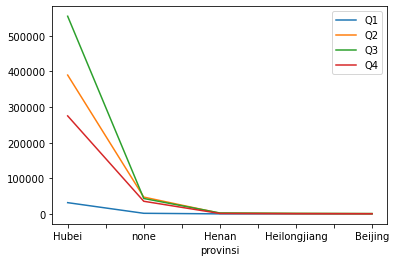

In [51]:
provinsi_teratas.plot()

Menampilkan data provinsi dan negara dengan kondisi jumlah sembuh >45000
diurutkan berdasarkan jumlah sembuh dari jumlah terbanyak.

In [52]:
Cari_kasus2= dfcovid_asiatimur[
    (dfcovid_asiatimur['sembuh'] > 45000)
].groupby(['provinsi','negara'])[['sembuh']].sum().sort_values(by='sembuh', ascending=False)

In [53]:
Cari_kasus2

,,sembuh
provinsi,negara,
Hubei,China,18117094.0
Tokyo,Japan,477809.0


Membuat plot bar dari data Cari_kasus2 untuk melihat visualisai data secara sederhana

<AxesSubplot:xlabel='provinsi,negara'>

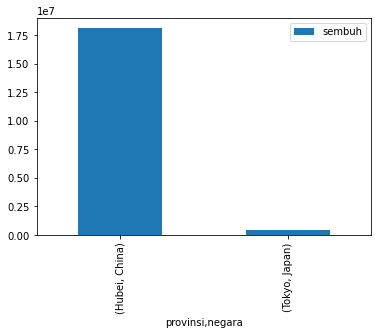

In [54]:
Cari_kasus2.plot(kind = 'bar')

Menampilkan data provinsi dan negara dengan kondisi jumlah konfirm >45000
diurutkan berdasarkan jumlah konfirm dari jumlah terbanyak.

In [55]:
Cari_kasus3= dfcovid_asiatimur[
    (dfcovid_asiatimur['konfirm'] > 45000)
].groupby(['provinsi','negara'])[['konfirm']].sum().sort_values(by='konfirm', ascending=False)

In [56]:
Cari_kasus3

,,konfirm
provinsi,negara,
Hubei,China,19410794.0
Tokyo,Japan,1145692.0
none,"Korea, South",912010.0


Membuat plot pie dari data Cari_kasus3 untuk melihat visualisai data secara sederhana

<AxesSubplot:title={'center':'tingkat konfirm'}, ylabel='konfirm'>

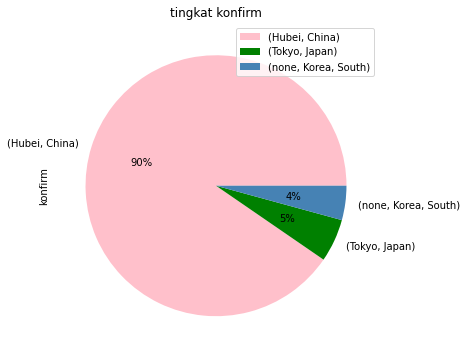

In [57]:
Cari_kasus3.plot(kind='pie', y='konfirm', autopct='%1.0f%%', figsize=(10, 6), colors = ['pink', 'green', 
'steelblue', 'cyan', 'yellow'], title='tingkat konfirm')

Menampilkan data provinsi dan negara dengan kondisi jumlah aktif >10000
diurutkan berdasarkan jumlah aktif dari jumlah terbanyak.

In [58]:
Cari_kasus4= dfcovid_asiatimur[
    (dfcovid_asiatimur['aktif'] > 10000)
].groupby(['provinsi','negara'])[['aktif']].sum().sort_values(by='aktif', ascending=False)

In [59]:
Cari_kasus4

aktif
provinsi negara                
none     Korea, South  294416.0
         Japan         152563.0
Tokyo    Japan          12957.0

Membuat plot line dari data Cari_kasus4 untuk melihat visualisai data secara sederhana

<AxesSubplot:xlabel='provinsi,negara'>

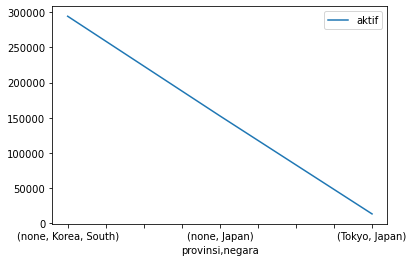

In [60]:
Cari_kasus4.plot()

## Conclusions, Assumptions, Overall Analysis

Pada negara bagian Asia Timur khususnya Japan,China, Korea-South dan Mongolia, negara China memiliki angka terbanyak di bagian
jumlah konfirm dan sembuh dibandingkan dengan 3 negara lainnya. Hal ini dikarenakan negara China adalah negara pertama menyebarnya
virus covid begitu pula dilihat dari jumlah penduduk nya pun masuk dalam kategori penduduk terpadat di dunia. 
Sedangkan untuk jumlah aktif terbanyak berada di negara Korea_South. 

Berdasarkan periode Q1,Q2,Q3 dan Q4 pada tahun 2020, dapat dibandingkan berdasarkan jumlah kematian dari 4 negara , periode kematian 
terbanyak ada di periode Q3. Hal ini saya mengasumsikan bahwa pada rentang Q1, Q2, dan Q3 angka kematian terus naik karena penerapan
 lockdown belum dikatakan efektif, pada priode Q4 angka kematian menurun karena sudah diterapkan lockdown secara efektif.


